In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, total_stellar_mass, gasmetals_profile, metals_density_profile

redshift=2

# Lower Mass Galaxies ($10^9$ to $10^{10.5}$ $M_\odot$)

In [2]:
redshift = 2
#this initializes the values in simulation_data.galaxies.galaxy_population
id_dict = {}
id_dict[0] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=9.0, mass_max=9.75)
id_dict[1] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=9.75, mass_max=10.5)
# id_dict[2] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.1, mass_max=11.4)
# id_dict[3] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.4, mass_max=11.7)
# id_dict[4] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.7, mass_max=12.0)

# id_range = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12.0)
# print(len(id_range))

# for idx in id_range:
#     get_galaxy_particle_data(id=idx, redshift=redshift, populate_dict=False)

#this gets and saves the particle data for each galaxy in our selection
ids = []
for b in id_dict:
    np.random.seed(13)
    print(len(id_dict[b]))
    for idx in np.random.choice(id_dict[b], 100, replace=False):
        ids.append(idx)
        #get_galaxy_particle_data(id=idx, redshift=redshift, populate_dict=False)

http://www.tng-project.org/api/TNG100-1/snapshots/z=2/subhalos/?mass_stars__gt=0.06774000000000001&mass_stars__lt=0.38093001368394247
http://www.tng-project.org/api/TNG100-1/snapshots/z=2/subhalos/?mass_stars__gt=0.38093001368394247&mass_stars__lt=2.14212688699806
7912
3529


## [Z]
median profile, unweighted

<ipython-input-4-be922adafa0c>:45: RuntimeWarning: invalid value encountered in log10
  ax1.plot(np.array(radial_percentiles[1:]), np.log10(func(radial_percentiles[1:], a, b, c)), 'b--', label='higher mass fit')


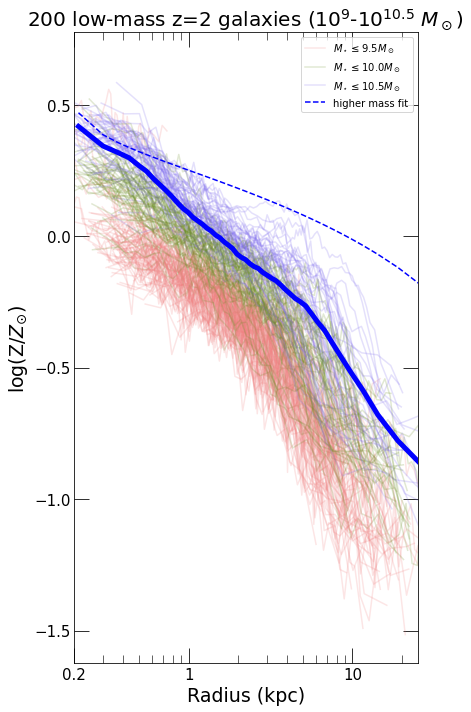

In [4]:
#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(6, 10))
f.set_facecolor('w')
n_bins = 50
label_bool = [True, True, True]

distance = np.zeros(0)
big_metallicity = np.zeros(0)
stellar_data = {}
for id in ids:
    stellar_data = get_galaxy_particle_data(id=id, redshift=redshift, populate_dict=True)
    yy, xx, R, metallicity = metallicity_profile(id=id, redshift=redshift, n_bins=n_bins)
    big_metallicity = np.concatenate((big_metallicity, metallicity[1:-2]), axis = None)
    mass = total_stellar_mass(id=id, redshift=redshift)
    if mass <= 9.5:
        color = 'lightcoral'
        label = '$M_\star \leq 9.5 M_\odot$'
        n = 0
    elif mass <= 10.0:
        color = 'olivedrab'
        label = '$M_\star \leq 10.0 M_\odot$'
        n = 1
    else:
        color = 'mediumslateblue'
        label = '$M_\star \leq 10.5 M_\odot$'
        n = 2
        
    if label_bool[n] == True:
        ax1.plot(xx[1:-2], np.log10(yy[1:-2]), color, alpha = 0.2, label=label)
        label_bool[n] = False
    else:
        ax1.plot(xx[1:-2], np.log10(yy[1:-2]), color, alpha = 0.2)
    distance = np.concatenate((distance, R[1:-2]), axis = None)
radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_metallicity, 'median', bins=radial_percentiles)
ax1.plot(np.array(radial_percentiles[1:]), np.log10(np.array(statistic)), c='blue', linewidth=5)

def func(x, a, b, c):
    return a*np.log10(x+b) + c
a = -0.7495
b = -0.1904
c = 1.7152
ax1.plot(np.array(radial_percentiles[1:]), np.log10(func(radial_percentiles[1:], a, b, c)), 'b--', label='higher mass fit')

ax1.set_title('200 low-mass z='+str(redshift)+' galaxies ($10^9$-$10^{10.5}$ $M_\odot$)', fontsize=20) #
ax1.set_xlim(0.2, 25)
#ax1.set_ylim(-1.25, 0.9)
ax1.set_xlabel("Radius (kpc)", fontsize=19)
ax1.set_ylabel('log(Z/$Z_{\odot}$)', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax1.legend()

f.tight_layout()

## [Fe/H]
median, unweighted

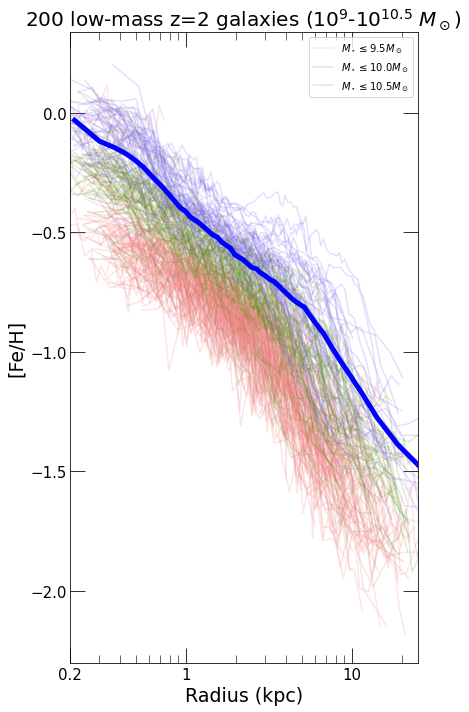

In [13]:
#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(6, 10))
f.set_facecolor('w')
n_bins = 50
label_bool = [True, True, True]

#z=2 star-forming galaxies
distance = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids:
    yy, log_ratio, xx, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    big_metallicity = np.concatenate((big_metallicity, log_ratio[1:-2]), axis = None)
    mass = total_stellar_mass(id=id, redshift=redshift)
    if mass <= 9.5:
        color = 'lightcoral'
        label = '$M_\star \leq 9.5 M_\odot$'
        n = 0
    elif mass <= 10.0:
        color = 'olivedrab'
        label = '$M_\star \leq 10.0 M_\odot$'
        n = 1
    else:
        color = 'mediumslateblue'
        label = '$M_\star \leq 10.5 M_\odot$'
        n = 2
        
    if label_bool[n] == True:
        ax1.plot(xx[1:-2], yy[1:-2], color, alpha = 0.2, label=label)
        label_bool[n] = False
    else:
        ax1.plot(xx[1:-2], yy[1:-2], color, alpha = 0.2)
    distance = np.concatenate((distance, R[1:-2]), axis = None)
radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_metallicity, 'median', bins=radial_percentiles)
ax1.plot(np.array(radial_percentiles[1:]), np.array(statistic), c='blue', linewidth=5)
ax1.set_title('200 low-mass z='+str(redshift)+' galaxies ($10^9$-$10^{10.5}$ $M_\odot$)', fontsize=20) #
ax1.set_xlim(0.2, 25)
#ax1.set_ylim(-1.25, 0.9)
ax1.set_xlabel("Radius (kpc)", fontsize=19)
ax1.set_ylabel('[Fe/H]', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax1.legend()

f.tight_layout()

median, radius normalized to effective radius

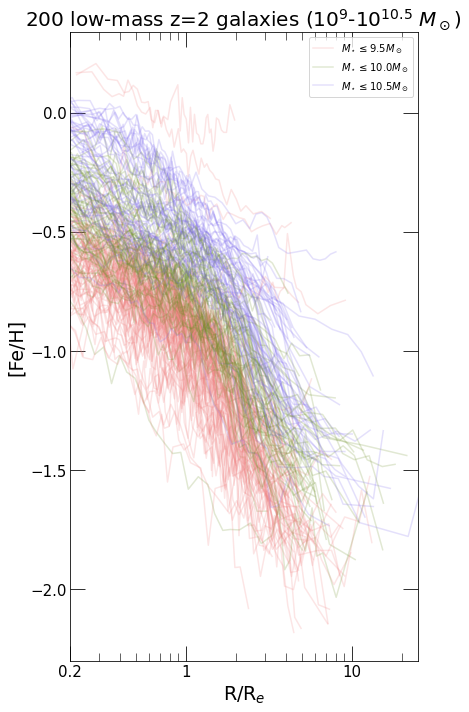

In [9]:
#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(6, 10))
f.set_facecolor('w')
n_bins = 50
label_bool = [True, True, True]

#z=2 star-forming galaxies
# distance = np.zeros(0)
# big_metallicity = np.zeros(0)
for id in ids:
    yy, log_ratio, xx, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='distance_norm')
#     big_metallicity = np.concatenate((big_metallicity, log_ratio[1:-2]), axis = None)
    mass = total_stellar_mass(id=id, redshift=redshift)
    if mass <= 9.5:
        color = 'lightcoral'
        label = '$M_\star \leq 9.5 M_\odot$'
        n = 0
    elif mass <= 10.0:
        color = 'olivedrab'
        label = '$M_\star \leq 10.0 M_\odot$'
        n = 1
    else:
        color = 'mediumslateblue'
        label = '$M_\star \leq 10.5 M_\odot$'
        n = 2
        
    if label_bool[n] == True:
        ax1.plot(xx[1:-2], yy[1:-2], color, alpha = 0.2, label=label)
        label_bool[n] = False
    else:
        ax1.plot(xx[1:-2], yy[1:-2], color, alpha = 0.2)
#     distance = np.concatenate((distance, R[1:-2]), axis = None)
# radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
# for i in range(1, (n_bins+1)):
#     radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_metallicity, 'median', bins=radial_percentiles)
# ax1.plot(np.array(radial_percentiles[1:]), np.array(statistic), c='blue', linewidth=5)
ax1.set_title('200 low-mass z='+str(redshift)+' galaxies ($10^9$-$10^{10.5}$ $M_\odot$)', fontsize=20) #
ax1.set_xlim(0.2, 25)
# ax1.set_ylim(-1.25, 0.9)
ax1.set_xlabel("R/R$_e$", fontsize=19)
ax1.set_ylabel('[Fe/H]', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax1.legend()

f.tight_layout()

gas abundance

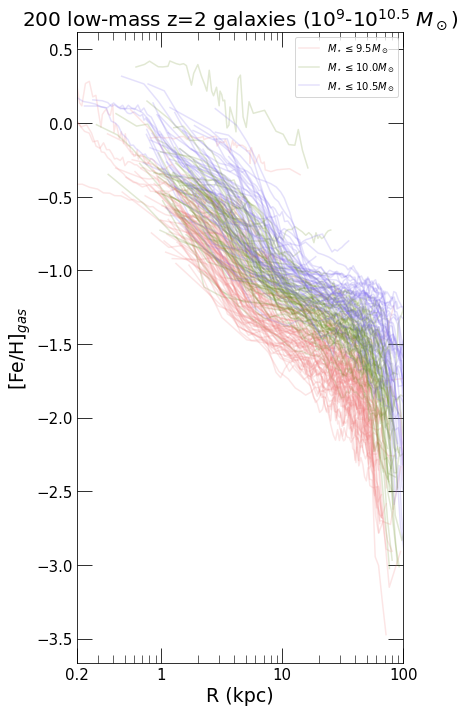

In [3]:
#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(6, 10))
f.set_facecolor('w')
n_bins = 50
label_bool = [True, True, True]

#z=2 star-forming galaxies
for id in ids:
    yy, log_ratio, xx, R = gasmetals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    mass = total_stellar_mass(id=id, redshift=redshift)
    if len(yy) == 1:
        pass
    else:
        if mass <= 9.5:
            color = 'lightcoral'
            label = '$M_\star \leq 9.5 M_\odot$'
            n = 0
        elif mass <= 10.0:
            color = 'olivedrab'
            label = '$M_\star \leq 10.0 M_\odot$'
            n = 1
        else:
            color = 'mediumslateblue'
            label = '$M_\star \leq 10.5 M_\odot$'
            n = 2

        if label_bool[n] == True:
            ax1.plot(xx[1:-2], yy[1:-2], color, alpha = 0.2, label=label)
            label_bool[n] = False
        else:
            ax1.plot(xx[1:-2], yy[1:-2], color, alpha = 0.2)
        
ax1.set_title('200 low-mass z='+str(redshift)+' galaxies ($10^9$-$10^{10.5}$ $M_\odot$)', fontsize=20) #
ax1.set_xlim(0.2, 100)
# ax1.set_ylim(-1.25, 0.9)
ax1.set_xlabel("R (kpc)", fontsize=19)
ax1.set_ylabel('[Fe/H]$_{gas}$', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10, 100], minor=False)
ax1.set_xticklabels(['0.2', '1', '10', '100'])
ax1.legend()

f.tight_layout()

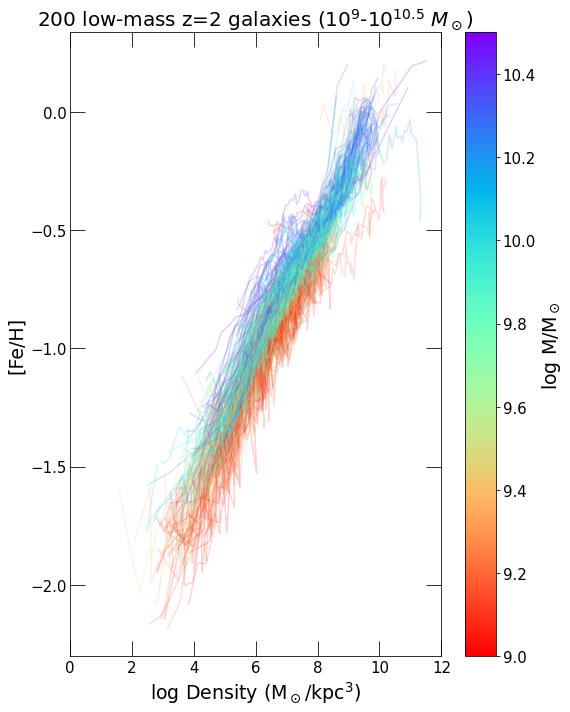

In [3]:
from matplotlib import colors

#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(8, 10))
f.set_facecolor('w')
n_bins = 50

colormap = plt.get_cmap('rainbow_r')
norm = colors.Normalize(vmin=9.0, vmax=10.5)

#z=2 star-forming galaxies
for id in ids:
    yy, log_ratio, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    mass = total_stellar_mass(id=id, redshift=redshift)
    color = colormap(norm(mass))
    ax1.plot(np.log10(xx[1:-2]), yy[1:-2], color=color, alpha = 0.2)
ax1.set_title('200 low-mass z='+str(redshift)+' galaxies ($10^9$-$10^{10.5}$ $M_\odot$)', fontsize=20) #
ax1.set_xlim(0, 12)
#ax1.set_ylim(-1.25, 0.9)
ax1.set_xlabel("log Density (M$_\odot$/kpc$^3$)", fontsize=19)
ax1.set_ylabel('[Fe/H]', fontsize=19)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
# ax1.set_xticks([0.2, 1, 10], minor=False)
# ax1.set_xticklabels(['0.2', '1', '10'])

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('log M/M$_\odot$', fontsize=19)
cbar.ax.tick_params(labelsize=15)

f.tight_layout()

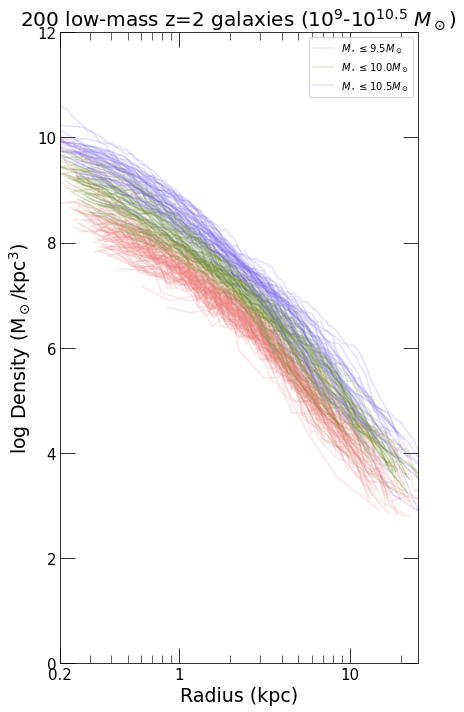

In [6]:
#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(6, 10))
f.set_facecolor('w')
n_bins = 50
label_bool = [True, True, True]

#z=2 star-forming galaxies
for id in ids:
    yy, log_ratio, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    mass = total_stellar_mass(id=id, redshift=redshift)
    if mass <= 9.5:
        color = 'lightcoral'
        label = '$M_\star \leq 9.5 M_\odot$'
        n = 0
    elif mass <= 10.0:
        color = 'olivedrab'
        label = '$M_\star \leq 10.0 M_\odot$'
        n = 1
    else:
        color = 'mediumslateblue'
        label = '$M_\star \leq 10.5 M_\odot$'
        n = 2
        
    if label_bool[n] == True:
        ax1.plot(percentiles[1:-2], np.log10(xx[1:-2]), color, alpha = 0.2, label=label)
        label_bool[n] = False
    else:
        ax1.plot(percentiles[1:-2], np.log10(xx[1:-2]), color, alpha = 0.2)
ax1.set_title('200 low-mass z='+str(redshift)+' galaxies ($10^9$-$10^{10.5}$ $M_\odot$)', fontsize=20) #
ax1.set_xlim(0.2, 25)
ax1.set_ylim(0, 12)
ax1.set_xlabel("Radius (kpc)", fontsize=19)
ax1.set_ylabel('log Density (M$_\odot$/kpc$^3$)', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax1.legend()

f.tight_layout()

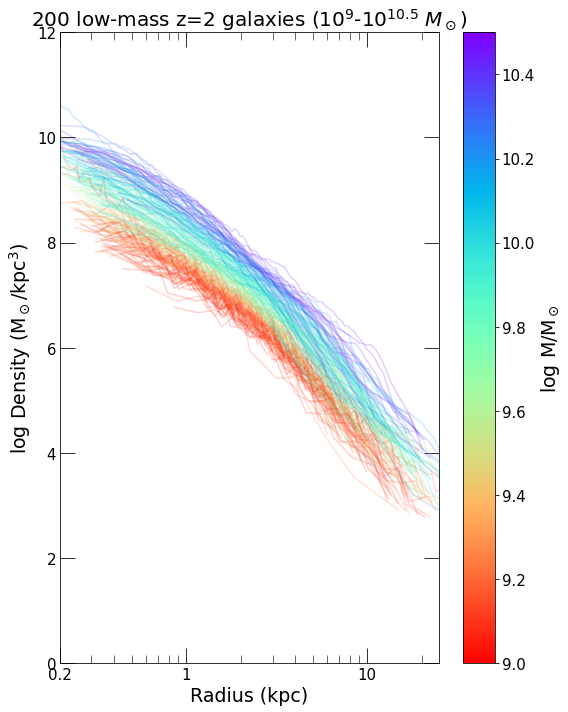

In [4]:
from matplotlib import colors

#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(8, 10))
f.set_facecolor('w')
n_bins = 50


colormap = plt.get_cmap('rainbow_r')
norm = colors.Normalize(vmin=9.0, vmax=10.5)

#z=2 star-forming galaxies
for id in ids:
    yy, log_ratio, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    mass = total_stellar_mass(id=id, redshift=redshift)
    color = colormap(norm(mass))
    ax1.plot(percentiles[1:-2], np.log10(xx[1:-2]), color=color, alpha = 0.2)
ax1.set_title('200 low-mass z='+str(redshift)+' galaxies ($10^9$-$10^{10.5}$ $M_\odot$)', fontsize=20) #
ax1.set_xlim(0.2, 25)
ax1.set_ylim(0, 12)
ax1.set_xlabel("Radius (kpc)", fontsize=19)
ax1.set_ylabel('log Density (M$_\odot$/kpc$^3$)', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('log M/M$_\odot$', fontsize=19)
cbar.ax.tick_params(labelsize=15)

f.tight_layout()

## [Mg/Fe]
median, unweighted

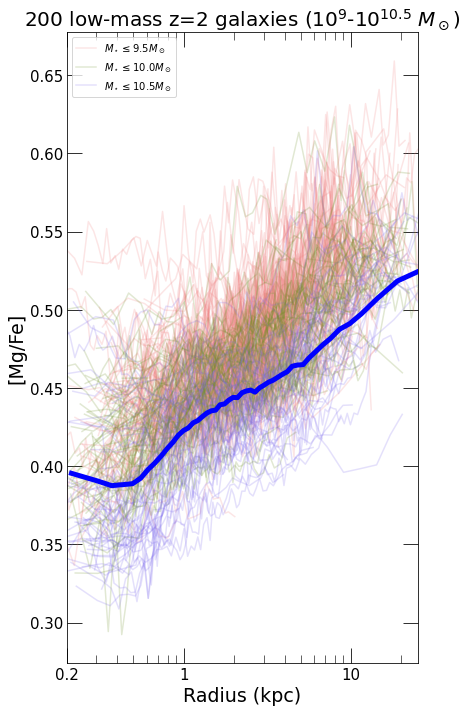

In [14]:
#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(6, 10))
f.set_facecolor('w')
n_bins = 50
label_bool = [True, True, True]

#z=2 star-forming galaxies
distance = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids:
    yy, log_ratio, xx, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron')
    big_metallicity = np.concatenate((big_metallicity, log_ratio[1:-2]), axis = None)
    mass = total_stellar_mass(id=id, redshift=redshift)
    if mass <= 9.5:
        color = 'lightcoral'
        label = '$M_\star \leq 9.5 M_\odot$'
        n = 0
    elif mass <= 10.0:
        color = 'olivedrab'
        label = '$M_\star \leq 10.0 M_\odot$'
        n = 1
    else:
        color = 'mediumslateblue'
        label = '$M_\star \leq 10.5 M_\odot$'
        n = 2
        
    if label_bool[n] == True:
        ax1.plot(xx[1:-2], yy[1:-2], color, alpha = 0.2, label=label)
        label_bool[n] = False
    else:
        ax1.plot(xx[1:-2], yy[1:-2], color, alpha = 0.2)
    distance = np.concatenate((distance, R[1:-2]), axis = None)
radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_metallicity, 'median', bins=radial_percentiles)
ax1.plot(np.array(radial_percentiles[1:]), np.array(statistic), c='blue', linewidth=5)
ax1.set_title('200 low-mass z='+str(redshift)+' galaxies ($10^9$-$10^{10.5}$ $M_\odot$)', fontsize=20) #
ax1.set_xlim(0.2, 25)
#ax1.set_ylim(-1.25, 0.9)
ax1.set_xlabel("Radius (kpc)", fontsize=19)
ax1.set_ylabel('[Mg/Fe]', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax1.legend()

f.tight_layout()

## [Mg/H]
median, unweighted

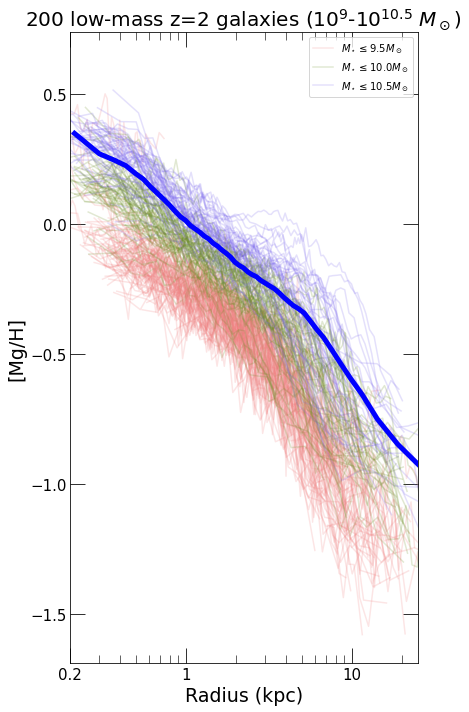

In [3]:
#metallicity profiles
f, (ax1) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(6, 10))
f.set_facecolor('w')
n_bins = 50
label_bool = [True, True, True]

#z=2 star-forming galaxies
distance = np.zeros(0)
big_metallicity = np.zeros(0)
for id in ids:
    yy, log_ratio, xx, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='hydrogen')
    big_metallicity = np.concatenate((big_metallicity, log_ratio[1:-2]), axis = None)
    mass = total_stellar_mass(id=id, redshift=redshift)
    if mass <= 9.5:
        color = 'lightcoral'
        label = '$M_\star \leq 9.5 M_\odot$'
        n = 0
    elif mass <= 10.0:
        color = 'olivedrab'
        label = '$M_\star \leq 10.0 M_\odot$'
        n = 1
    else:
        color = 'mediumslateblue'
        label = '$M_\star \leq 10.5 M_\odot$'
        n = 2
        
    if label_bool[n] == True:
        ax1.plot(xx[1:-2], yy[1:-2], color, alpha = 0.2, label=label)
        label_bool[n] = False
    else:
        ax1.plot(xx[1:-2], yy[1:-2], color, alpha = 0.2)
    distance = np.concatenate((distance, R[1:-2]), axis = None)
radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
for i in range(1, (n_bins+1)):
    radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_metallicity, 'median', bins=radial_percentiles)
ax1.plot(np.array(radial_percentiles[1:]), np.array(statistic), c='blue', linewidth=5)
ax1.set_title('200 low-mass z='+str(redshift)+' galaxies ($10^9$-$10^{10.5}$ $M_\odot$)', fontsize=20) #
ax1.set_xlim(0.2, 25)
#ax1.set_ylim(-1.25, 0.9)
ax1.set_xlabel("Radius (kpc)", fontsize=19)
ax1.set_ylabel('[Mg/H]', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])
ax1.legend()

f.tight_layout()